In [0]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error ,roc_auc_score,confusion_matrix

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [0]:
#No. 10 (todo exceto letras G e I);
#No. 11 (todo exceto letra G);
#No. 13 (todo menos KNN).

In [222]:
# a)
auto = pd.read_csv('https://raw.githubusercontent.com/tonnioo/scripts_e_vagabundagens/master/Auto.csv')
auto = auto.iloc[:,1:] #tirando coluna sem nome

auto['mpg_abv_med'] = auto.mpg

mpg_median = np.median(auto.mpg)

auto.mpg_abv_med = auto.mpg_abv_med.replace(auto.mpg_abv_med.loc[auto.mpg_abv_med <= mpg_median], 0)
auto.mpg_abv_med = auto.mpg_abv_med.replace(auto.mpg_abv_med.loc[auto.mpg_abv_med > mpg_median], 1)
auto.mpg_abv_med = auto.mpg_abv_med.apply(int)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_abv_med
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


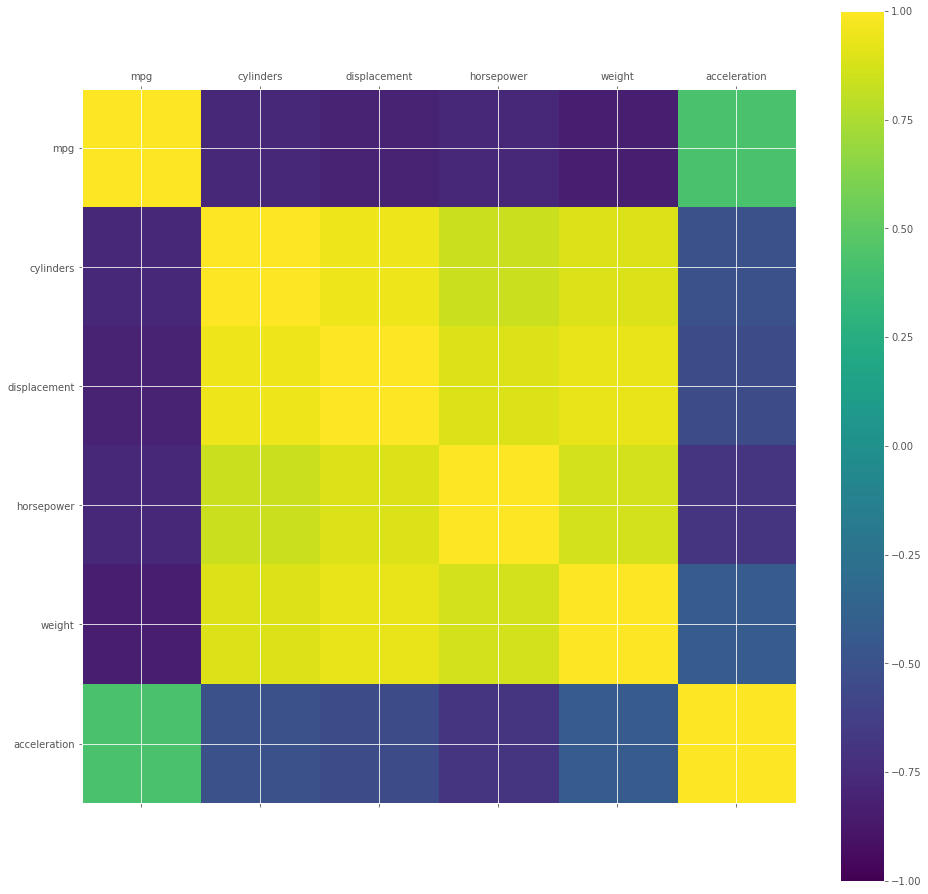

In [223]:
# b)
autoplot = auto.iloc[:,:6]
fig,ax = plt.subplots(figsize=(16,16))
cax = ax.matshow(autoplot.corr(),vmin=-1,vmax=1)
plt.xticks(range(6),autoplot.columns)
plt.yticks(range(6),autoplot.columns)
plt.colorbar(cax)
plt.show()

.


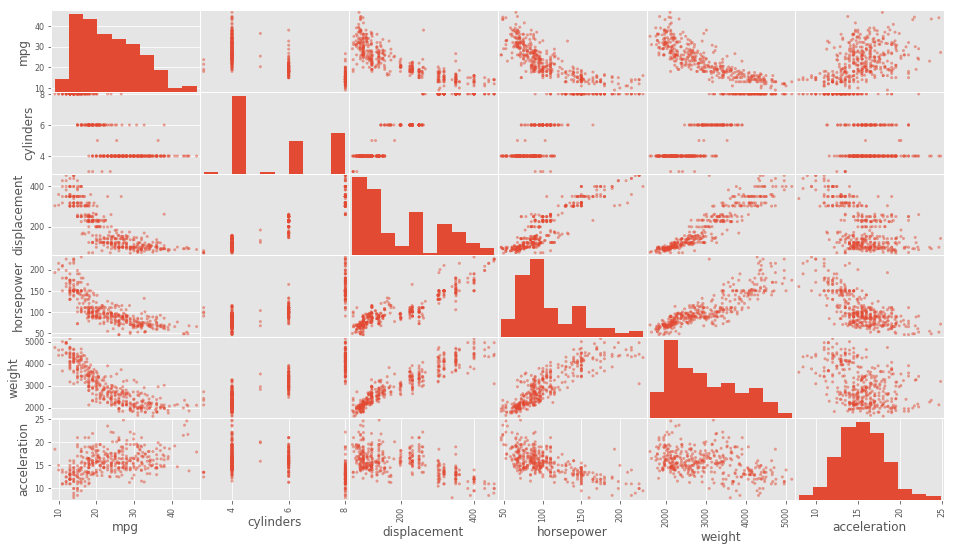

In [224]:
scatter_matrix(autoplot,figsize=(16,9))
print('.')

cylinders, displacement, horsepower and weight seem like good predictors for mpg

In [0]:
# c)

x = auto.iloc[:,1:7]
y = np.array([[i] for i in auto.mpg_abv_med])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [226]:
# d)

lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
yhat = lda.predict(x_test)
roc_auc_score(y_test,yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9555555555555555

In [227]:
y_test = y_test.reshape(1,-1)[0]
pd.crosstab(y_test,yhat)

col_0,0,1
row_0,,
0,41,4
1,0,34


In [228]:
# e)


qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
yhat = qda.predict(x_test)
roc_auc_score(y_test,yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9852941176470589

In [229]:
# f)


logit = LogisticRegression(solver='lbfgs')
logit.fit(x_train,y_train)
yhat = logit.predict(x_test)
roc_auc_score(y_test,yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9888888888888888